# 5 - Checking the hypothesis

In [47]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Importing data

df = pd.read_csv('data/eda_cleaned+improved.csv', delimiter=",")

# Setting date column to date time.
df['date'] = pd.to_datetime(df['date'])

## Checking for houses fitting 'mid price range' in interesting zipcode-areas

In [48]:
# List of the desired zip codes created through own research. See book 4, Chapter Livelihood

desired_zipcodes = [98102, 98112, 98122, 98121, 98103, 98109, 98107, 98104, 98117, 98118]

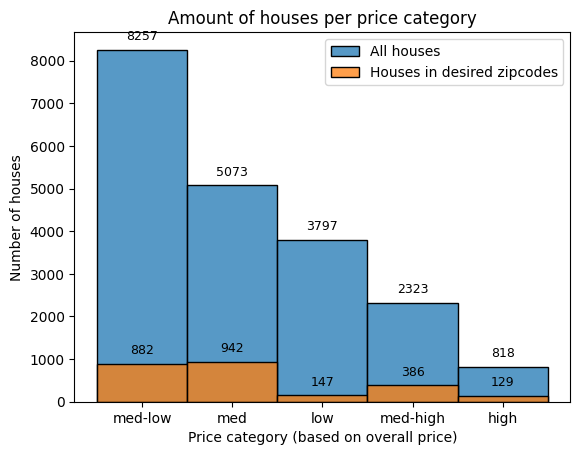

The sum of houses in the desired zipcode across all price categories is 2486


In [49]:
# This histogram shows the amount of houses for each price category

ax = sns.histplot(
    data=df,
    x='price_cat_total',
    label='All houses'
)

# Filtering the dataframe for houses in the interesting neighborhoods

df_desired_zips = df[df['zipcode'].isin(desired_zipcodes)]

# Adding the filtered dataframe to the histogram

sns.histplot(
    data=df_desired_zips,
    x='price_cat_total',
    label = 'Houses in desired zipcodes'
)

# Adding labels to the bars

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')
                
plt.xlabel('Price category (based on overall price)')
plt.ylabel('Number of houses')
plt.title('Amount of houses per price category')
plt.legend(loc='upper right')

plt.show()

print(f'The sum of houses in the desired zipcode across all price categories is {df_desired_zips.house_id.count()}')


---
**Interim finding**
**&rarr; There is an offer across all price categories for houses in the desired zip codes which stand for a lively, central neighborhood.**

---

In the next step, I focus on the houses matching the medium price range and are located in the desired zip codes.

In [50]:
# Filtering the houses in the desired zip areas for medium price category, saving it on a new df for further use

df_desired_zips_and_price = df_desired_zips[df_desired_zips['price_cat_total'] == 'med']

To drill down even further, i'll have a look at the houses per neighborhood name, which is a speaking translation of the zip code.

In addition to that I'll filter out houses, that are in poor condition or offer a low standard according to the king county house grading systen.

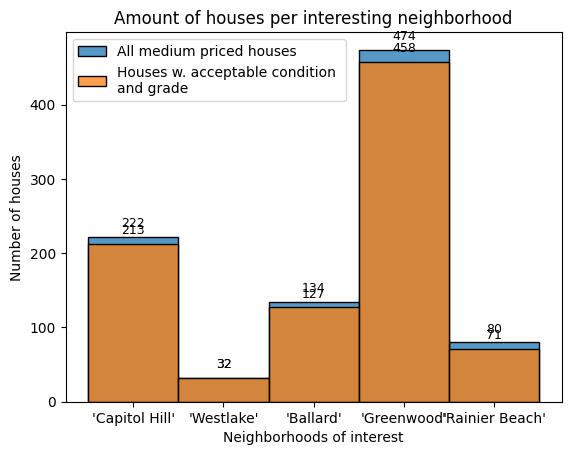

The sum of houses meeting the expectation of grade and condition are 901


In [51]:
# Creating a histogram showing houses per neighborhood

ax = sns.histplot(
    data=df_desired_zips_and_price,
    x='neighborhood_name',
    label='All medium priced houses'
)

# Filtering the houses and exkluding houses with condition poorer than 3 and grade worth than 7

df_top_quality = df_desired_zips_and_price[
    (df_desired_zips_and_price['condition'] >= 3) & (df_desired_zips_and_price['grade'] >= 7)
]

# Adding the new data frame to the histogram

sns.histplot(
    data=df_top_quality,
    x='neighborhood_name',
    label='Houses w. acceptable condition \nand grade'
)

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

# Proper labeling of the chart
    
plt.xlabel('Neighborhoods of interest')
plt.ylabel('Number of houses')
plt.title('Amount of houses per interesting neighborhood')
plt.legend(loc='upper left')

plt.show()

print(f'The sum of houses meeting the expectation of grade and condition are {df_top_quality.house_id.count()}')


---
**Interim findings**

**&rarr; The List of interesting zip codes is represented in 5 different neighborhoods**


**&rarr; Each neighborhood has offering regarding the middle price range with Greenwood offering the most houses**


**&rarr; Most of the houses per neighborhood have average or better condition**


**&rarr; Most of the houses per neighborhood have a average grade of construction or even better**


**&rarr; Condition and grade could be further increased to narrow the data set down**


---

In the next step, let's find when it is the right time to buy. Therefore I try to identify trends in the given data

In [54]:
# Adding month and year as a column to the last data frame
    
df_top_quality.loc[:, 'year'] = df_top_quality.loc[:, 'date'].dt.year
df_top_quality.loc[:, 'month'] = df_top_quality.loc[:, 'date'].dt.month



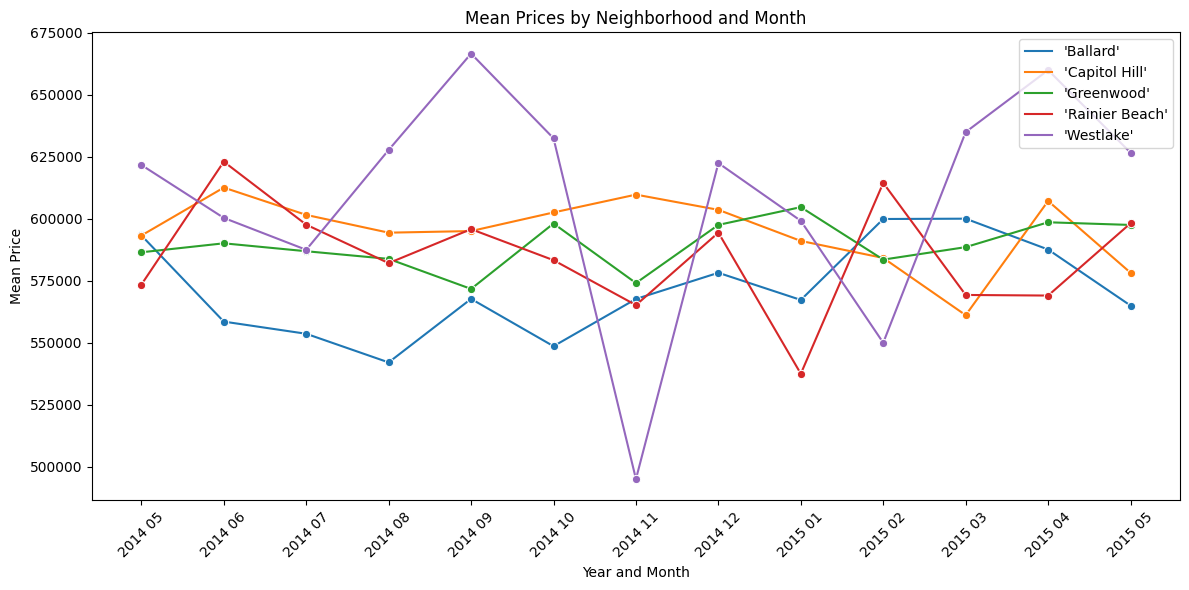

In [55]:
# Creating a pivot table to calculate the mean price for each neighborhood, year, and month
pivot_table = df_top_quality.pivot_table(values='price', index=['year', 'month', 'neighborhood_name'], aggfunc='mean').reset_index()

# Combining year and month for x-axis labels
pivot_table['year_month'] = pivot_table['year'].astype(str) + ' ' + pivot_table['month'].apply(lambda x: '{:02d}'.format(x))

# Setting up a seabord lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(data=pivot_table, x='year_month', y='price', hue='neighborhood_name', marker='o')

# Setting labels for the chart
plt.xlabel('Year and Month')
plt.ylabel('Mean Price')
plt.title('Mean Prices by Neighborhood and Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()


---
**Interim finding**

**&rarr; Each neighborhood has its own price trend for houses in the middle price category and with a certain grade and condition**

**&rarr; The timeframe of the data set is not big enough to identify repeating patterns**

**&rarr; Assumption for Westlake: If the november collapse is a pattern, look for offerings at the same time next year.**

**&rarr; Assumption for Ballard: The summer months could be a good time to buy**

**&rarr; Assumption for Capitol Hill, Greenwod and Rainier Beach: There is no specific time in the year. Wait for good offerings anytime**

---

In the next step, let's discuss other characteristics of the resulting set.

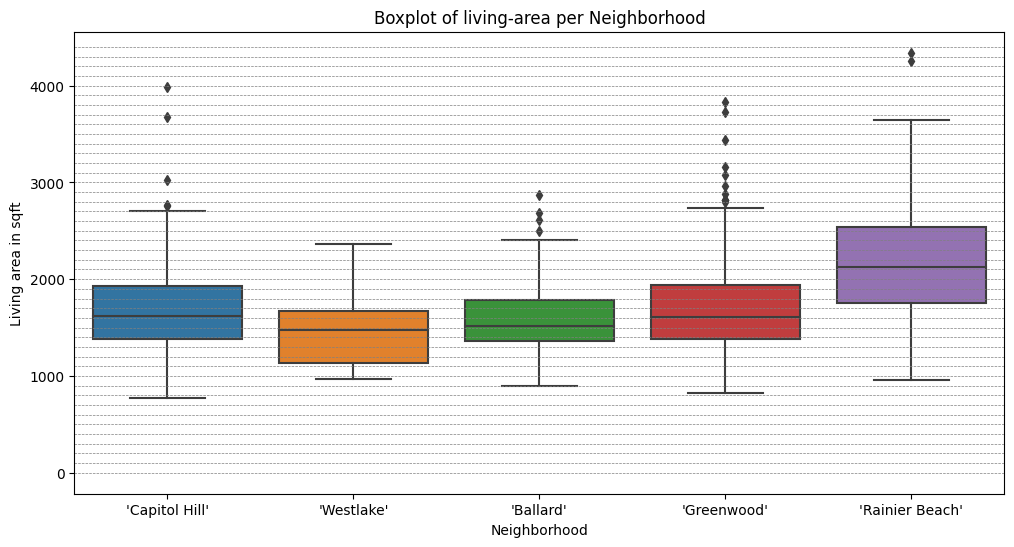

In [62]:
plt.figure(figsize=(12, 6))  # Set the figure size

# Create the boxplot 
sns.boxplot(data=df_top_quality, x='neighborhood_name', y='sqft_living')

# Add horizontal lines in the background
for value in range(0, 4500, 100):  # Customize the range and interval as needed
    plt.axhline(value, color='gray', linestyle='dashed', linewidth=0.5)


# Set labels and title
plt.xlabel('Neighborhood')
plt.ylabel('Living area in sqft')
plt.title('Boxplot of living-area per Neighborhood')


plt.show()

---
**Interim finding**

**&rarr; In Rainier Beach the houses are usually larger than in Westlake**

---


KeyError: Text(0, 0, '1')

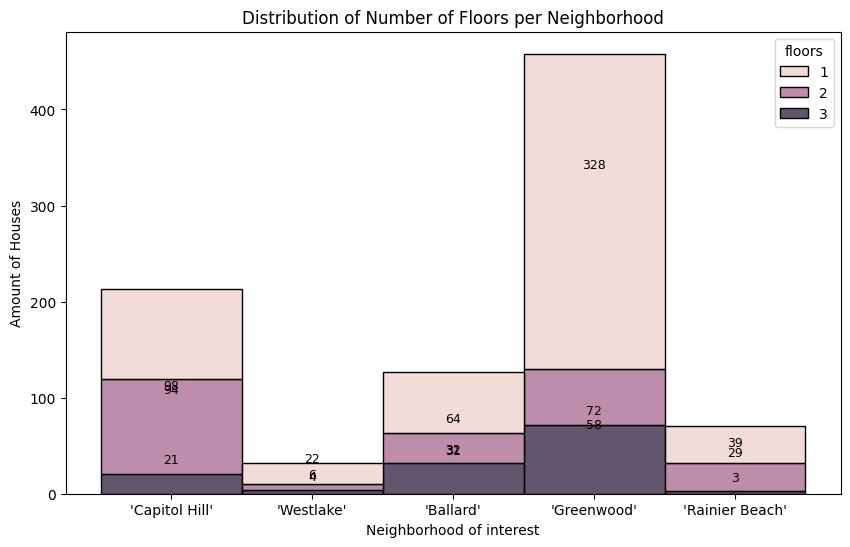

In [83]:
# Assuming your DataFrame is named df
plt.figure(figsize=(10, 6))  # Set the figure size

# Create the histogram using Seaborn
ax = sns.histplot(data=df_top_quality, x='neighborhood_name', hue='floors', multiple='stack')

# Set labels and title
plt.xlabel('Neighborhood of interest')
plt.ylabel('Amount of Houses')
plt.title('Distribution of Number of Floors per Neighborhood')

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

# Create a mapping of floor values to labels
floor_labels = {1: '1 Floor', 2: '2 Floors', 3: '3 Floors'}

# Show a legend with custom labels using the floor_labels mapping
handles, _ = ax.get_legend_handles_labels()
plt.legend(handles=handles, title='Number of Floors', labels=[floor_labels[label] for label in ax.get_legend().get_texts()])

# Adjust y-axis limit to make room for labels
plt.ylim(0, ax.get_ylim()[1] * 1.1)


plt.show()
